In [68]:
import pandas as pd
import numpy as np
import demoji
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import re
import string
%matplotlib inline

In [69]:
df = pd.read_csv('data.csv')
df.head()

,Channel,Video Title,Video Description,Video ID,Comment,Comment ID,Replies,Likes
0,GameSpot,FULL Microsoft Xbox E3 2019 Press Conference,Tune in to catch Phil Spencer and the Microsof...,73kSvsQ_kkA,1:17 Outer Worlds (Gameplay Trailer )\n5:08 Bl...,UgyolGA3btmyXsv1yPF4AaABAg,45,1186
1,GameSpot,FULL Microsoft Xbox E3 2019 Press Conference,Tune in to catch Phil Spencer and the Microsof...,73kSvsQ_kkA,John Wick survives all the way to 2077. Legit.,UgyI1VT_X38sdK5WxH94AaABAg,13,1599
2,GameSpot,FULL Microsoft Xbox E3 2019 Press Conference,Tune in to catch Phil Spencer and the Microsof...,73kSvsQ_kkA,so basically we should look forward to 2020,Ugz9XWu6VeIopjZvM7h4AaABAg,39,864
3,GameSpot,FULL Microsoft Xbox E3 2019 Press Conference,Tune in to catch Phil Spencer and the Microsof...,73kSvsQ_kkA,"Yet again, Cyberpunk stole the show!",UgzcLn8Q_NaPDOgESnV4AaABAg,45,916
4,GameSpot,FULL Microsoft Xbox E3 2019 Press Conference,Tune in to catch Phil Spencer and the Microsof...,73kSvsQ_kkA,By 2077 Keanu would be over 110 years old and ...,UgyY2EO51cu41wWCG0V4AaABAg,8,662


In [70]:
df = df[['Comment ID', 'Comment', 'Replies', 'Likes']]

### Data Cleaning

In [71]:
demoji.download_codes()

... OK (Got response in 0.17 seconds)
Writing emoji data to /Users/himanshumishra/.demoji/codes.json ...
... OK


In [72]:
def cleannames(string):
    string = demoji.replace(string, "") # remove emoji
    string = string.lower()
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = re.sub('[,\.!?]',' ', string ) # removing special characters
    return string

In [73]:
df['Cleaned_Comment'] = df['Comment'].apply(cleannames)

In [74]:
def remove_punc(text):
    text_nonpunct = ''.join([char for char in text if char not in string.punctuation]) 
    return text_nonpunct

In [75]:
df['Cleaned_Comment'] = df['Comment'].apply(remove_punc)

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(lambda x: remove_stopwords(x))

In [37]:
df.head()

,Comment ID,Comment,Replies,Likes,Cleaned_Comment
0,UgyolGA3btmyXsv1yPF4AaABAg,1:17 Outer Worlds (Gameplay Trailer )\n5:08 Bl...,45,1186,117 Outer Worlds Gameplay Trailer \n508 Bleedi...
1,UgyI1VT_X38sdK5WxH94AaABAg,John Wick survives all the way to 2077. Legit.,13,1599,John Wick survives all the way to 2077 Legit
2,Ugz9XWu6VeIopjZvM7h4AaABAg,so basically we should look forward to 2020,39,864,so basically we should look forward to 2020
3,UgzcLn8Q_NaPDOgESnV4AaABAg,"Yet again, Cyberpunk stole the show!",45,916,Yet again Cyberpunk stole the show
4,UgyY2EO51cu41wWCG0V4AaABAg,By 2077 Keanu would be over 110 years old and ...,8,662,By 2077 Keanu would be over 110 years old and ...


### Language Detection

In [76]:
from langdetect import detect
df['Language'] = 0

In [77]:
count = 0
for i in range(0,len(df)):
    temp = df['Cleaned_Comment'].loc[i]
    count +=1
    try:
        df['Language'].loc[i] = detect(temp)
    except:
        df['Language'].loc[i] = 'error'

/Applications/anaconda3/envs/deeplearning/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [78]:
print(df.shape)
df.head()


(885, 6)


,Comment ID,Comment,Replies,Likes,Cleaned_Comment,Language
0,UgyolGA3btmyXsv1yPF4AaABAg,1:17 Outer Worlds (Gameplay Trailer )\n5:08 Bl...,45,1186,117 Outer Worlds Gameplay Trailer \n508 Bleedi...,en
1,UgyI1VT_X38sdK5WxH94AaABAg,John Wick survives all the way to 2077. Legit.,13,1599,John Wick survives all the way to 2077 Legit,en
2,Ugz9XWu6VeIopjZvM7h4AaABAg,so basically we should look forward to 2020,39,864,so basically we should look forward to 2020,en
3,UgzcLn8Q_NaPDOgESnV4AaABAg,"Yet again, Cyberpunk stole the show!",45,916,Yet again Cyberpunk stole the show,en
4,UgyY2EO51cu41wWCG0V4AaABAg,By 2077 Keanu would be over 110 years old and ...,8,662,By 2077 Keanu would be over 110 years old and ...,en


In [79]:
df2 = df[df['Language']=='en']
df2.shape

(745, 6)

### Wordcloud

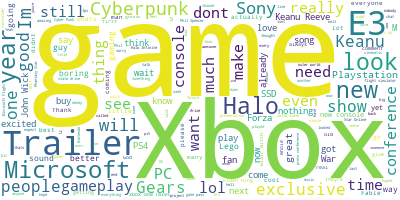

In [45]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df2['Cleaned_Comment'].values))

wordcloud = WordCloud(background_color="white", 
                      max_words=10000,
                      contour_width=3, 
                      contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [46]:
from itertools import islice
import nltk
import re
from textblob import Blobber
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/himanshumishra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
def get_vader_score(comment):
    text = str(comment)
    # Remove special characters except ‘
    text = re.sub("[^\w\d’\s]+", '', text)
    # Convert to lowercase
    text_lower = text.lower()
    # Polarity score returns dictionary and we fetch only the compound score
    compound_score = sid.polarity_scores(text_lower)['compound']
    return(compound_score)

In [48]:
COLS = ['Comment ID', 'Cleaned_Comment', 'Vader_Score']
df3 = pd.DataFrame(columns=COLS)

for index, row in islice(df.iterrows(), 0, None):
    new_entry = []
    Cleaned_Comment = str(row['Cleaned_Comment'])
    Vader_Score = get_vader_score(Cleaned_Comment)
    new_entry += [row['Comment ID'], Cleaned_Comment, Vader_Score]
    single_survey_sentimet_df = pd.DataFrame([new_entry],   columns=COLS)
    df3 = df3.append(single_survey_sentimet_df, ignore_index=True)

In [106]:
df3.to_csv('cleaned_data.csv', index = False)
df3

,Comment ID,Cleaned_Comment,Vader_Score
0,UgyolGA3btmyXsv1yPF4AaABAg,117 Outer Worlds Gameplay Trailer \n508 Bleedi...,-0.6908
1,UgyI1VT_X38sdK5WxH94AaABAg,John Wick survives all the way to 2077 Legit,0.0000
2,Ugz9XWu6VeIopjZvM7h4AaABAg,so basically we should look forward to 2020,0.0000
3,UgzcLn8Q_NaPDOgESnV4AaABAg,Yet again Cyberpunk stole the show,0.0000
4,UgyY2EO51cu41wWCG0V4AaABAg,By 2077 Keanu would be over 110 years old and ...,0.5829
...,...,...,...
880,UgzvqN1_RO8l8a47R4V4AaABAg,So does no one realize that every game that th...,0.2551
881,UgxpYV4pB_dxIdYUTaV4AaABAg,I give it a 9 out of 10,0.0000
882,Ugy8xZ5-vPAuTR2Wzah4AaABAg,Only reason cyberpunk is gonna sell is because...,0.0000
883,UgzI2Qi4lvwgc7fTTfF4AaABAg,Why are people being ungrateful,-0.4588


In [50]:
import matplotlib.pyplot as plt

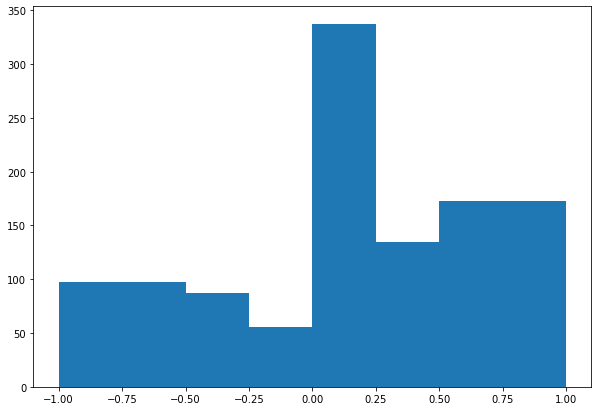

In [51]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df3['Vader_Score'], bins = [-1, -0.5, -0.25, 0, 0.25, 0.5, 1]) 
  
# Show plot 
plt.show()

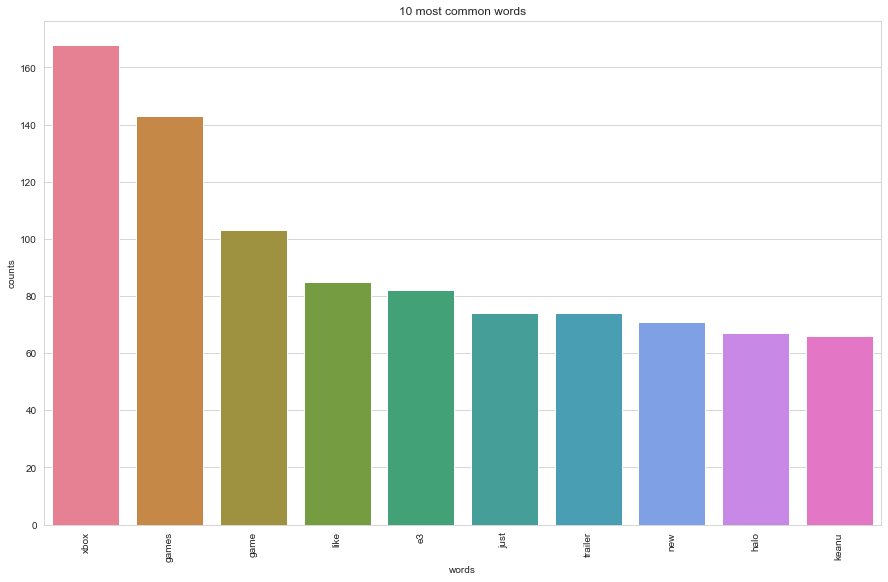

In [52]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df3['Cleaned_Comment'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [54]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
xbox trailer games new console pc good game gears gameplay

Topic #1:
like halo games just new looking does gameplay better gears

Topic #2:
game keanu halo just games star know xbox like reeves

Topic #3:
xbox games song halo e3 im exclusives love keanu exclusive

Topic #4:
ssd solid state drive combination looks keanu breathtaking thing said

Topic #5:
games wait 2077 keanu good like game microsoft did cyberpunk

Topic #6:
games cyberpunk e3 just game xbox lol like amazing microsoft

Topic #7:
like new looks witch blair game games im fable keanu

Topic #8:
john wick e3 trailers gameplay time sony disappointment ring elden

Topic #9:
xbox e3 sony year microsoft like conference game just thing
